# (5주차) 10월4일 -- draft
> 딥러닝의 기초 - 깊은신경망(DNN)

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 로지스틱 회귀의 한계 

### 신문기사 (데이터의 모티브)

`-` [스펙이 높아도 취업이 안된다고 합니다..](https://www.joongang.co.kr/article/23637092#home)

**중소·지방 기업 "뽑아봤자 그만두니까"**

중소기업 관계자들은 고스펙 지원자를 꺼리는 이유로 높은 퇴직률을 꼽는다. 여건이 좋은 대기업으로 이직하거나 회사를 관두는 경우가 많다는 하소연이다. 고용정보원이 지난 3일 공개한 자료에 따르면 중소기업 청년취업자 가운데 49.5%가 2년 내에 회사를 그만두는 것으로 나타났다.

중소 IT업체 관계자는 "기업 입장에서 가장 뼈아픈 게 신입사원이 그만둬서 새로 뽑는 일"이라며 "명문대 나온 스펙 좋은 지원자를 뽑아놔도 1년을 채우지 않고 그만두는 사원이 대부분이라 우리도 눈을 낮춰 사람을 뽑는다"고 말했다.

### 가짜데이터 

`-` 위의 기사를 모티브로 한 데이터 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-10-04-dnnex0.csv')
df

,x,underlying,y
0,-1.000000,0.000045,0.0
1,-0.998999,0.000046,0.0
2,-0.997999,0.000047,0.0
3,-0.996998,0.000047,0.0
4,-0.995998,0.000048,0.0
...,...,...,...
1995,0.995998,0.505002,0.0
1996,0.996998,0.503752,0.0
1997,0.997999,0.502501,0.0
1998,0.998999,0.501251,1.0


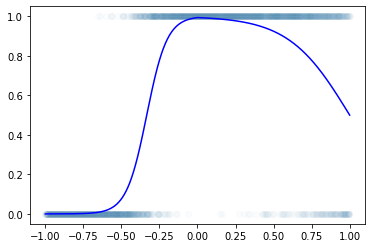

In [3]:
plt.plot(df.x,df.y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')

### 로지스틱 회귀로 적합

In [4]:
x=torch.tensor(df.x).float().reshape(-1,1)
y=torch.tensor(df.y).float().reshape(-1,1)

In [5]:
net = torch.nn.Sequential(
    torch.nn.Linear(1,1),
    torch.nn.Sigmoid()
)

In [6]:
loss_fn = torch.nn.BCELoss()

In [7]:
optimizr = torch.optim.Adam(net.parameters(),lr=0.05) 

In [8]:
for epoc in range(5000):
    ## step1 
    yhat = net(x) 
    ## step2 
    loss = loss_fn(yhat,y)
    ## step3
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

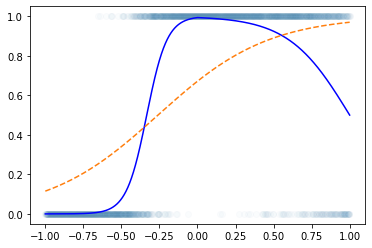

In [9]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')
plt.plot(x,net(x).data,'--')

### 해결책

`-` sigmoid 넣기 전의 상태가 꺽인그래프 이어야 한다. 

In [10]:
sig = torch.nn.Sigmoid()

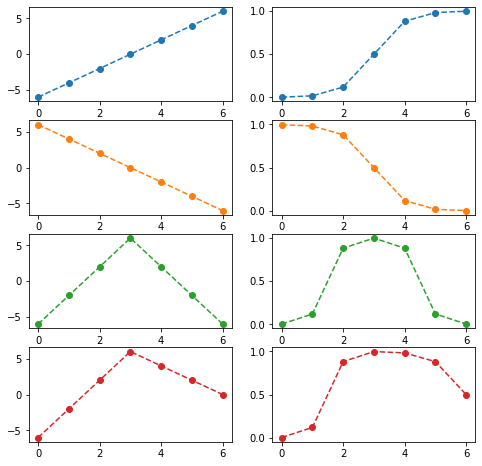

In [11]:
fig,ax = plt.subplots(4,2,figsize=(8,8))
u1 = torch.tensor([-6,-4,-2,0,2,4,6])
u2 = torch.tensor([6,4,2,0,-2,-4,-6])
u3 = torch.tensor([-6,-2,2,6,2,-2,-6])
u4 = torch.tensor([-6,-2,2,6,4,2,0])
ax[0,0].plot(u1,'--o',color='C0');ax[0,1].plot(sig(u1),'--o',color='C0')
ax[1,0].plot(u2,'--o',color='C1');ax[1,1].plot(sig(u2),'--o',color='C1')
ax[2,0].plot(u3,'--o',color='C2');ax[2,1].plot(sig(u3),'--o',color='C2')
ax[3,0].plot(u4,'--o',color='C3');ax[3,1].plot(sig(u4),'--o',color='C3')

## DNN을 이용한 해결 

`-` 목표: 아래와 같은 벡터 ${\boldsymbol u}$를 만들어보자. 

${\boldsymbol u} = [u_1,u_2,\dots,u_{2000}], \quad u_i = \begin{cases} 9x_i +4.5& x_i <0 \\ -4.5x_i + 4.5& x_i >0 \end{cases}$

### 꺽인 그래프를 만드는 방법1

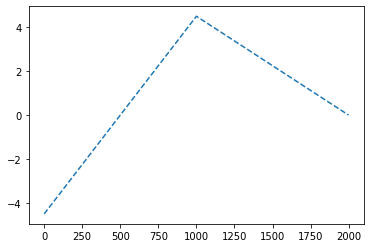

In [12]:
u = [9*xi+4.5 if xi <0 else -4.5*xi+4.5 for xi in x.reshape(-1).tolist()]
plt.plot(u,'--')

### 꺽인 그래프를 만드는 방법2

`-` 전략: 선형변환 $\to$ ReLU $\to$ 선형변환 

(예비학습) ReLU 함수란?

$ReLU(x) = \max(0,x)$

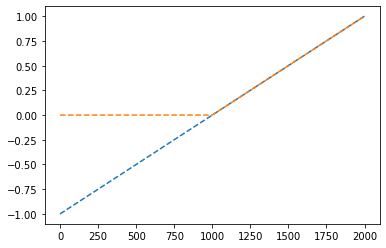

In [13]:
relu=torch.nn.ReLU()
plt.plot(x,'--')
plt.plot(relu(x),'--')

예비학습끝

우리 전략 다시 확인: 선형변환1 -> 렐루 -> 선형변환2

***(선형변환1)***

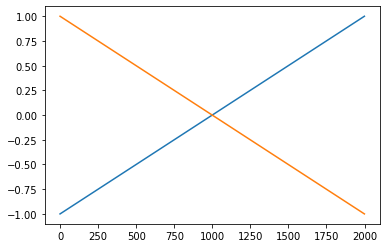

In [14]:
plt.plot(x);plt.plot(-x)

***(렐루)***

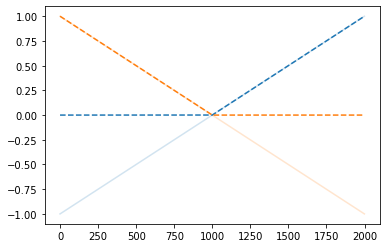

In [15]:
plt.plot(x,alpha=0.2);plt.plot(-x,alpha=0.2)
plt.plot(relu(x),'--',color='C0');plt.plot(relu(-x),'--',color='C1')

***(선형변환2)***

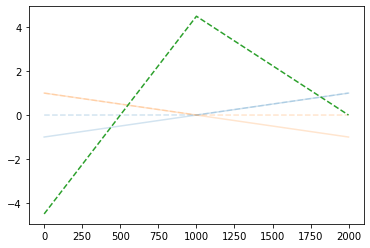

In [16]:
plt.plot(x,alpha=0.2);plt.plot(-x,alpha=0.2)
plt.plot(relu(x),'--',color='C0',alpha=0.2);plt.plot(relu(-x),'--',color='C1',alpha=0.2)
plt.plot(-4.5*relu(x)-9.0*relu(-x)+4.5,'--',color='C2')

그래서..? 

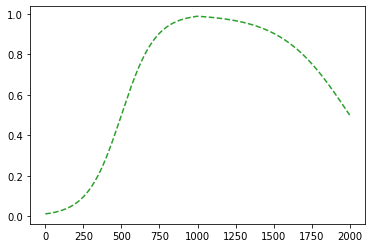

In [17]:
plt.plot(sig(-4.5*relu(x)-9.0*relu(-x)+4.5),'--',color='C2')

정리하면!

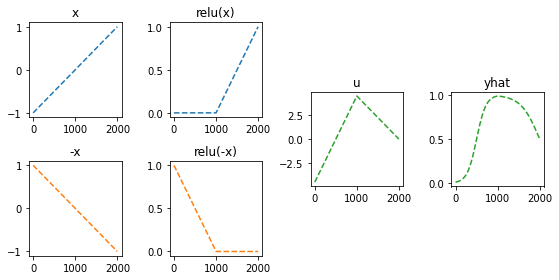

In [18]:
fig = plt.figure(figsize=(8, 4))
spec = fig.add_gridspec(4, 4)
ax1 = fig.add_subplot(spec[:2,0]); ax1.set_title('x'); ax1.plot(x,'--',color='C0')
ax2 = fig.add_subplot(spec[2:,0]); ax2.set_title('-x'); ax2.plot(-x,'--',color='C1')
ax3 = fig.add_subplot(spec[:2,1]); ax3.set_title('relu(x)'); ax3.plot(relu(x),'--',color='C0')
ax4 = fig.add_subplot(spec[2:,1]); ax4.set_title('relu(-x)'); ax4.plot(relu(-x),'--',color='C1')
ax5 = fig.add_subplot(spec[1:3,2]); ax5.set_title('u'); ax5.plot(-4.5*relu(x)-9*relu(-x)+4.5,'--',color='C2')
ax6 = fig.add_subplot(spec[1:3,3]); ax6.set_title('yhat'); ax6.plot(sig(-4.5*relu(x)-9*relu(-x)+4.5),'--',color='C2')
fig.tight_layout()

### torch.nn.Linear()를 이용한 꺽인 그래프 구현 

In [19]:
torch.manual_seed(43052)
l1 = torch.nn.Linear(in_features=1,out_features=2,bias=True) 
a1 = torch.nn.ReLU()
l2 = torch.nn.Linear(in_features=2,out_features=1,bias=True) 
a2 = torch.nn.Sigmoid() 

In [20]:
net = torch.nn.Sequential(l1,a1,l2,a2) 

In [21]:
l1.weight,l1.bias,l2.weight,l2.bias

(Parameter containing:
 tensor([[-0.3467],
         [-0.8470]], requires_grad=True),
 Parameter containing:
 tensor([0.3604, 0.9336], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2880, -0.6282]], requires_grad=True),
 Parameter containing:
 tensor([0.2304], requires_grad=True))

In [22]:
l1.weight.data = torch.tensor([[1.0],[-1.0]])
l1.bias.data = torch.tensor([0.0, 0.0])
l2.weight.data = torch.tensor([[ -4.5, -9.0]])
l2.bias.data= torch.tensor([4.5])
l1.weight,l1.bias,l2.weight,l2.bias

(Parameter containing:
 tensor([[ 1.],
         [-1.]], requires_grad=True),
 Parameter containing:
 tensor([0., 0.], requires_grad=True),
 Parameter containing:
 tensor([[-4.5000, -9.0000]], requires_grad=True),
 Parameter containing:
 tensor([4.5000], requires_grad=True))

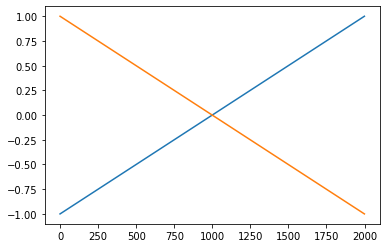

In [23]:
plt.plot(l1(x).data)

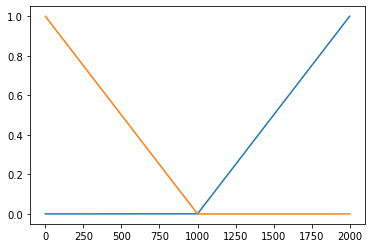

In [24]:
plt.plot(a1(l1(x)).data)

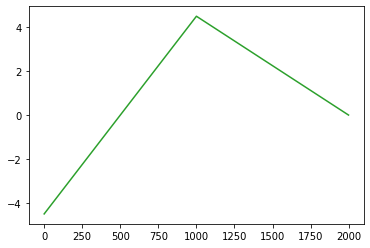

In [25]:
plt.plot(l2(a1(l1(x))).data,color='C2')

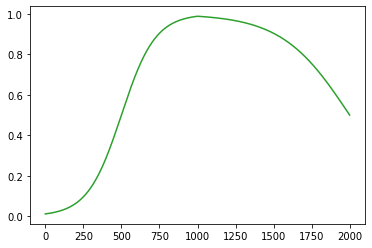

In [26]:
plt.plot(a2(l2(a1(l1(x)))).data,color='C2')

`-` 수식표현

1. ${\bf X}=\begin{bmatrix} x_1 \\ \dots \\ x_n \end{bmatrix}$

2. $l_1({\bf X})={\bf X}{\bf W}^{(1)}\overset{bc}{+} {\boldsymbol b}^{(1)}=\begin{bmatrix} x_1 & -x_1 \\ x_2 & -x_2 \\ \dots & \dots \\  x_n & -x_n\end{bmatrix}$
- ${\bf W}^{(1)}=\begin{bmatrix} 1 & -1 \end{bmatrix}$
- ${\boldsymbol b}^{(1)}=\begin{bmatrix} 0 & 0 \end{bmatrix}$

3. $(a_1\circ l_1)({\bf X})=\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big)=\begin{bmatrix} \text{relu}(x_1) & \text{relu}(-x_1) \\ \text{relu}(x_2) & \text{relu}(-x_2) \\ \dots & \dots \\  \text{relu}(x_n) & \text{relu}(-x_n)\end{bmatrix}$

4. $(l_2 \circ a_1\circ l_1)({\bf X})=\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big){\bf W}^{(2)}\overset{bc}{+}b^{(2)}=\begin{bmatrix} -4.5\times\text{relu}(x_1) -9.0 \times \text{relu}(-x_1) +4.5 \\ -4.5\times\text{relu}(x_2) -9.0 \times\text{relu}(-x_2) + 4.5 \\ \dots  \\ -4.5\times \text{relu}(x_n) -9.0 \times\text{relu}(-x_n)+4.5 \end{bmatrix}$ 
- ${\bf W}^{(2)}=\begin{bmatrix} -4.5 \\ -9 \end{bmatrix}$
- $b^{(2)}=4.5$

5. $net({\bf X})=(a_2 \circ l_2 \circ a_1\circ l_1)({\bf X})=\text{sig}\Big(\text{relu}\big({\bf X}{\bf W}^{(1)}\overset{bc}{+}{\boldsymbol b}^{(1)}\big){\bf W}^{(2)}\overset{bc}{+}b^{(2)}\Big)\\=\begin{bmatrix} \text{sig}\Big(-4.5\times\text{relu}(x_1) -9.0 \times \text{relu}(-x_1) +4.5\Big) \\ \text{sig}\Big(-4.5\times\text{relu}(x_2) -9.0 \times\text{relu}(-x_2) + 4.5 \Big)\\ \dots  \\ \text{sig}\Big(-4.5\times \text{relu}(x_n) -9.0 \times\text{relu}(-x_n)+4.5 \Big)\end{bmatrix}$ 


`-` 차원만 따지자

$\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,2)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,2)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{a_2}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$

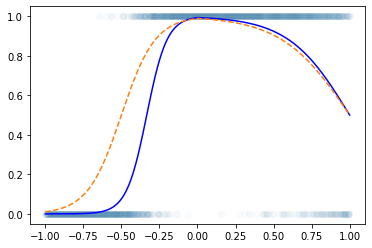

In [27]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(x,df.underlying,'-b')
plt.plot(x,net(x).data,'--')

### Step1 ~ Step4

`-` 준비

In [28]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=2),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=2,out_features=1),
    torch.nn.Sigmoid()) 

In [29]:
loss_fn = torch.nn.BCELoss()

In [30]:
optimizr = torch.optim.Adam(net.parameters()) # lr은 디폴트값으로..

`-` 반복 

Text(0.5, 1.0, 'before')

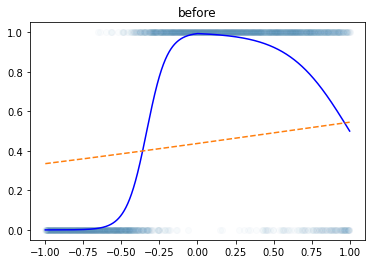

In [31]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(x,df.underlying,'-b')
plt.plot(x,net(x).data,'--')
plt.title("before")

In [32]:
for epoc in range(3000):
    ## step1 
    yhat = net(x) 
    ## step2 
    loss = loss_fn(yhat,y) 
    ## step3
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

Text(0.5, 1.0, 'after 3000 epochs')

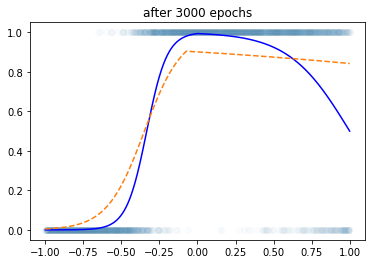

In [33]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(x,df.underlying,'-b')
plt.plot(x,net(x).data,'--')
plt.title("after 3000 epochs")

In [34]:
for epoc in range(3000):
    ## step1 
    yhat = net(x) 
    ## step2 
    loss = loss_fn(yhat,y) 
    ## step3
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

Text(0.5, 1.0, 'after 6000 epochs')

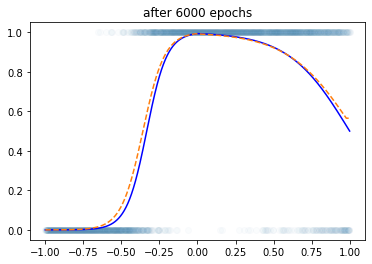

In [35]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(x,df.underlying,'-b')
plt.plot(x,net(x).data,'--')
plt.title("after 6000 epochs")

## DNN으로 해결가능한 다양한 예제

### 예제1

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-10-04-dnnex1.csv')

In [37]:
x = torch.tensor(df.x).float().reshape(-1,1)
y = torch.tensor(df.y).float().reshape(-1,1)

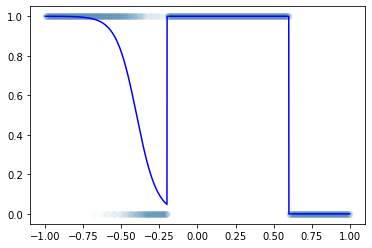

In [38]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')

In [39]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=16), # =u1 
    torch.nn.ReLU(), # = v1 
    torch.nn.Linear(in_features=16,out_features=1), # =u2
    torch.nn.Sigmoid() # = v2 = yhat
)

- $\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,16)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,16)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{a_2}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$

In [40]:
loss_fn = torch.nn.BCELoss()

In [41]:
optimizr = torch.optim.Adam(net.parameters())

In [42]:
for epoc in range(6000):
    ## 1
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()    

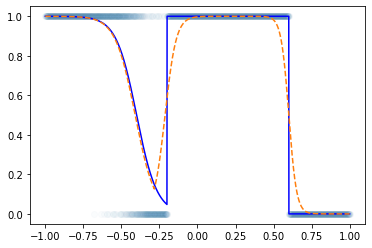

In [43]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')
plt.plot(x,net(x).data,'--')

### 예제2

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-10-04-dnnex2.csv')

In [45]:
x = torch.tensor(df.x).float().reshape(-1,1)
y = torch.tensor(df.y).float().reshape(-1,1)

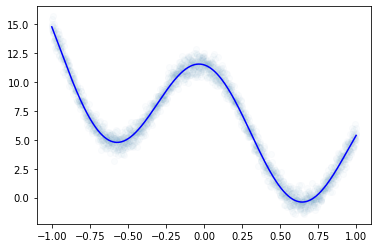

In [46]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')

(풀이1)

In [47]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=32), # =u1
    torch.nn.ReLU(), # =v1 
    torch.nn.Linear(in_features=32,out_features=1) # =u2 = v2 = yhat  
)

- $\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,32)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,32)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$

In [48]:
loss_fn = torch.nn.MSELoss()

In [49]:
optimizr = torch.optim.Adam(net.parameters())

In [50]:
for epoc in range(6000):
    ## 1
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()    

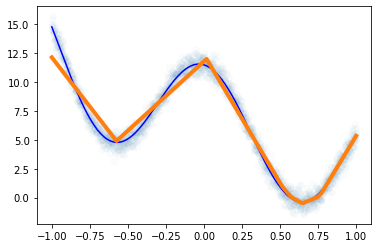

In [51]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')
plt.plot(x,net(x).data,'-',lw=4)

(풀이2) -- 좀 더 잘맞는 케이스, 초기값에 민감함

In [52]:
torch.manual_seed(5)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=32),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=32,out_features=1))

In [53]:
loss_fn = torch.nn.MSELoss()

In [54]:
optimizr = torch.optim.Adam(net.parameters())

In [55]:
for epoc in range(6000):
    ## 1
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()    

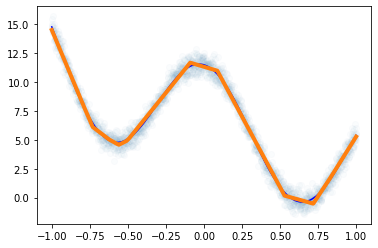

In [56]:
plt.plot(x,y,'o',alpha=0.02)
plt.plot(df.x,df.underlying,'-b')
plt.plot(x,net(x).data,'-',lw=4)

### 예제3

In [82]:
import seaborn as sns

In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-10-04-dnnex3.csv')
df

,x1,x2,y
0,-0.874139,0.210035,0.0
1,-1.143622,-0.835728,1.0
2,-0.383906,-0.027954,0.0
3,2.131652,0.748879,1.0
4,2.411805,0.925588,1.0
...,...,...,...
1995,-0.002797,-0.040410,0.0
1996,-1.003506,1.182736,0.0
1997,1.388121,0.079317,0.0
1998,0.080463,0.816024,1.0


<AxesSubplot:xlabel='x1', ylabel='x2'>

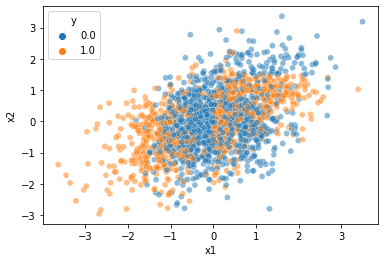

In [58]:
sns.scatterplot(data=df,x='x1',y='x2',hue='y',alpha=0.5)

In [59]:
x1 = torch.tensor(df.x1).float().reshape(-1,1)
x2 = torch.tensor(df.x2).float().reshape(-1,1)
X = torch.concat([x1,x2],axis=1)
y = torch.tensor(df.y).float().reshape(-1,1)

In [62]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=2,out_features=32), # u1
    torch.nn.ReLU(), # v1 
    torch.nn.Linear(in_features=32,out_features=1), # u2
    torch.nn.Sigmoid() # v2 
)

- $\underset{(n,2)}{\bf X} \overset{l_1}{\to} \underset{(n,32)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,32)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{a_2}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$

In [63]:
loss_fn = torch.nn.BCELoss()

In [64]:
optimizr = torch.optim.Adam(net.parameters())

In [65]:
for epoc in range(6000):
    ## 1
    yhat = net(X) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [66]:
df2 = df.assign(yhat=yhat.reshape(-1).tolist())

<AxesSubplot:xlabel='x1', ylabel='x2'>

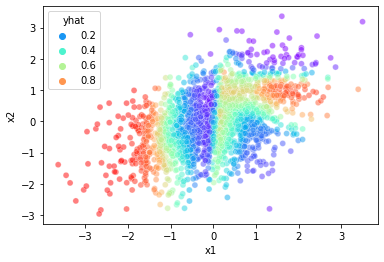

In [67]:
sns.scatterplot(data=df2,x='x1',y='x2',hue='yhat',alpha=0.5,palette='rainbow')

### 예제4

In [80]:
import torchvision
from fastai.data.all import *

`-` 데이터정리 

In [81]:
path = untar_data(URLs.MNIST_SAMPLE)

In [82]:
threes= (path/'train'/'3').ls()
sevens= (path/'train'/'7').ls()

In [83]:
threes[0]

Path('/home/cgb2/.fastai/data/mnist_sample/train/3/7339.png')

In [84]:
str(threes[0])

'/home/cgb2/.fastai/data/mnist_sample/train/3/7339.png'

In [85]:
img=torchvision.io.read_image(str(threes[0]))

In [86]:
three_tensor = torch.stack([torchvision.io.read_image(str(p)) for p in threes]).float()/255
seven_tensor = torch.stack([torchvision.io.read_image(str(p)) for p in sevens]).float()/255

In [87]:
three_tensor.shape,seven_tensor.shape

(torch.Size([6131, 1, 28, 28]), torch.Size([6265, 1, 28, 28]))

In [88]:
X = torch.concat([three_tensor,seven_tensor])
y = torch.tensor([0.0]*len(three_tensor) + [1.0]*len(seven_tensor)).reshape(-1,1) 

In [89]:
Xnp = X.reshape(-1,28*28)

`-` 학습1

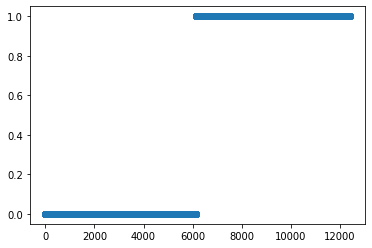

In [90]:
plt.plot(y,'o')

In [91]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=28*28,out_features=30),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=30,out_features=1),
    torch.nn.Sigmoid()
)

- $\underset{(n,784)}{\bf X} \overset{l_1}{\to} \underset{(n,30)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,30)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{a_2}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$

In [92]:
loss_fn = torch.nn.BCELoss()

In [93]:
optimizr = torch.optim.Adam(net.parameters())

In [94]:
yhat.shape,y.shape

(torch.Size([2000, 1]), torch.Size([12396, 1]))

In [95]:
for epoc in range(200):
    ## 1
    yhat = net(Xnp) 
    ## 2
    loss = loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

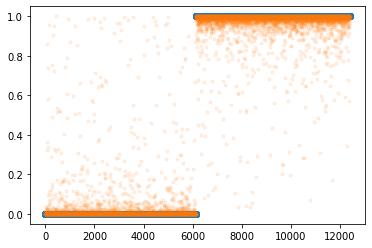

In [96]:
plt.plot(y,'o')
plt.plot(net(Xnp).data,'.',alpha=0.1)

## HW

## Appedix: 데이터 생성코드 

In [97]:
import numpy as np

`-` motivating example 

In [98]:
np.random.seed(43052)
x = np.linspace(-1,1,2000).tolist()
transform = lambda x: x*15+5 if x<0 else x*(-5) +5 
u = list(map(transform,x))
v = torch.nn.Sigmoid()(torch.tensor(u))
y = torch.bernoulli(v)
pd.DataFrame({'x':x, 'underlying':v,'y':y}).to_csv("2022-10-04-dnnex0.csv",index=False)

`-` 예제1

In [99]:
np.random.seed(43052)
x = np.linspace(-1,1,2000).tolist()
def transfrom(x):
    if x< -0.2:
        return -15*x-6
    elif x< 0.6:
        return 9
    else:
        return -9
u = list(map(transfrom,x))
v = torch.nn.Sigmoid()(torch.tensor(u))
y = torch.bernoulli(v)
pd.DataFrame({'x':x, 'underlying':v,'y':y}).to_csv("2022-10-04-dnnex1.csv",index=False)

`-` 예제2

In [100]:
torch.manual_seed(43052)
x = torch.linspace(-1,1,2000)
eps = torch.randn(2000)*0.5
fx =  2.5+4*torch.exp(-x) + 5*torch.cos(5*x) 
y = fx + eps
pd.DataFrame({'x':x, 'underlying':fx,'y':y}).to_csv("2022-10-04-dnnex2.csv",index=False)

`-` 예제3

In [160]:
x1,x2 = np.random.multivariate_normal([0,0],[[1,0.5],[0.5,1]],2000).T

In [292]:
np.random.seed(43052)
idx = np.linspace(-1,1,2000).tolist()
def transfrom1(x1,x2):
    if x1< 0:
        return -3*x1-3
    elif x1< 0.6:
        return 0
    elif x2>1.5:
        return -0.5*(x1)**2-10*x2+5
    else:
        return x1+2*x2-2
    
u = torch.tensor(list(map(transfrom1,x1,x2)))
v = torch.nn.Sigmoid()(u)
y = torch.bernoulli(v)
pd.DataFrame({'x1':x1, 'x2':x2, 'y':y}).to_csv("2022-10-04-dnnex3.csv",index=False)

In [ ]:
df= pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

<AxesSubplot:xlabel='x1', ylabel='x2'>

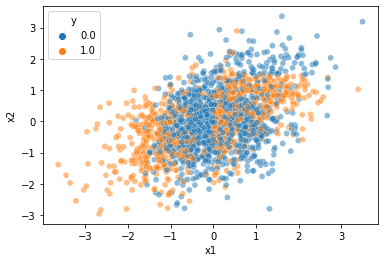

In [ ]:
sns.scatterplot(data=df,x='x1',y='x2',hue='y',alpha=0.5)